In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [46]:
insurance_data= pd.read_csv('/content/insurance.csv')

In [47]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
print(insurance_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [49]:
insurance_data.shape

(1338, 7)

In [50]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-52-66c148f886f3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


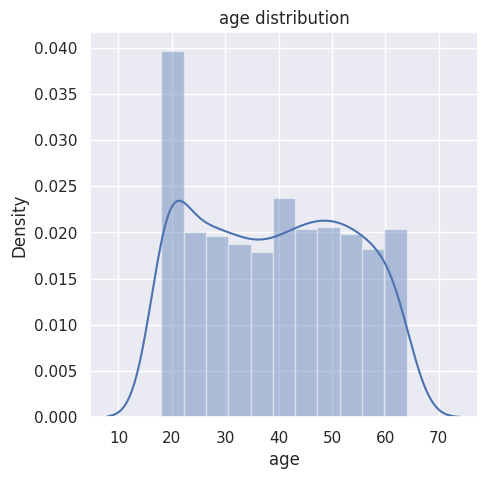

In [52]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['age'])
plt.title('age distribution')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

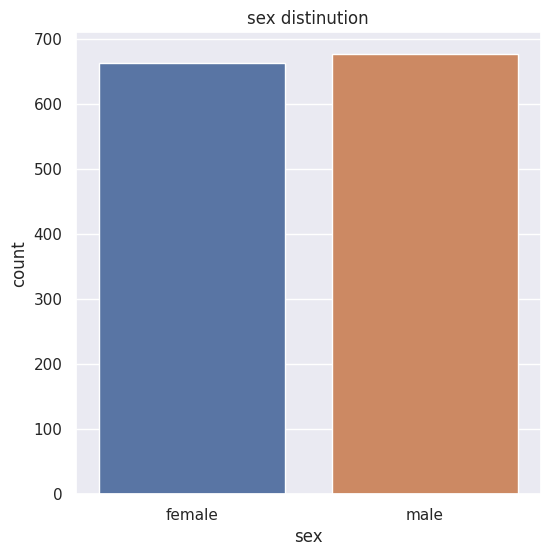

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('sex distinution')
plt.show

In [54]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-55-b4dc179f2b81>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


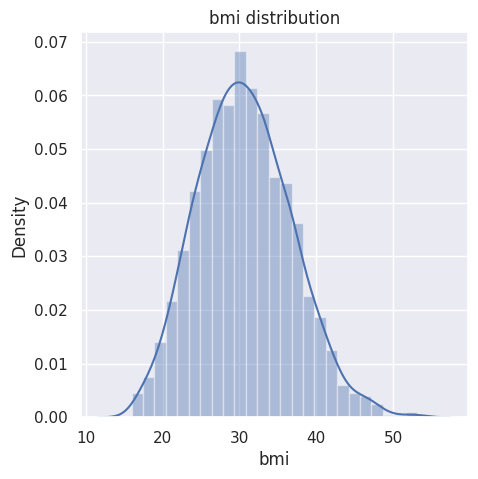

In [55]:
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title('bmi distribution')
plt.show()

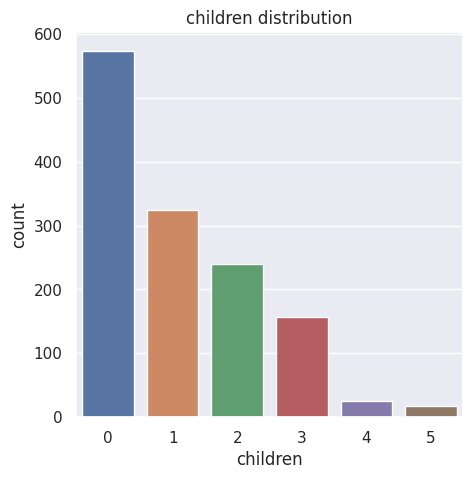

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_data)
plt.title('children distribution')
plt.show()

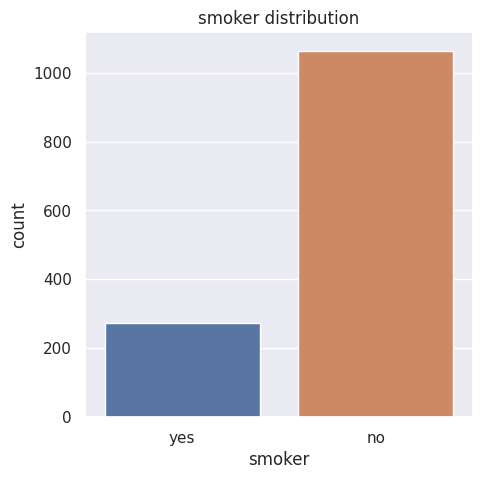

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smoker distribution')
plt.show()

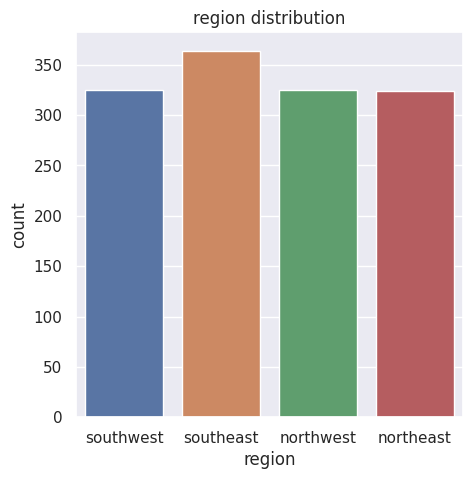

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_data)
plt.title('region distribution')
plt.show()

<ipython-input-59-61a65ba2e593>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


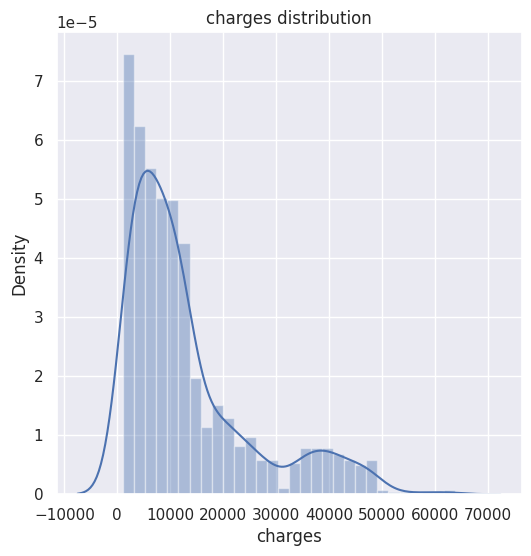

In [59]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('charges distribution')
plt.show()

In [60]:
#encoding sex column
insurance_data.replace({'sex':{'male':0 ,'female':1}},inplace=True)
#encoding smoker cloumn
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [62]:
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [64]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [85]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2 ,random_state=2)

In [67]:
model=LinearRegression()

In [68]:
model.fit(x_train,y_train)

LinearRegression()

In [69]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [87]:
training_data=model.predict(x_train)


In [79]:
r2_train= metrics.r2_score(y_train,training_data)
print(r2_train)

0.751505643411174


In [88]:
testing_data=model.predict(x_test)

In [86]:
r2_test= metrics.r2_score(y_test,testing_data)
print(r2_test)

0.7447273869684076


In [94]:
input_data=(31,1,25.74,0,1,0)
input_data_numpy=np.array(input_data)
input_data_reshape=input_data_numpy.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
